<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [139]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [140]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


<Axes: xlabel='Industry'>

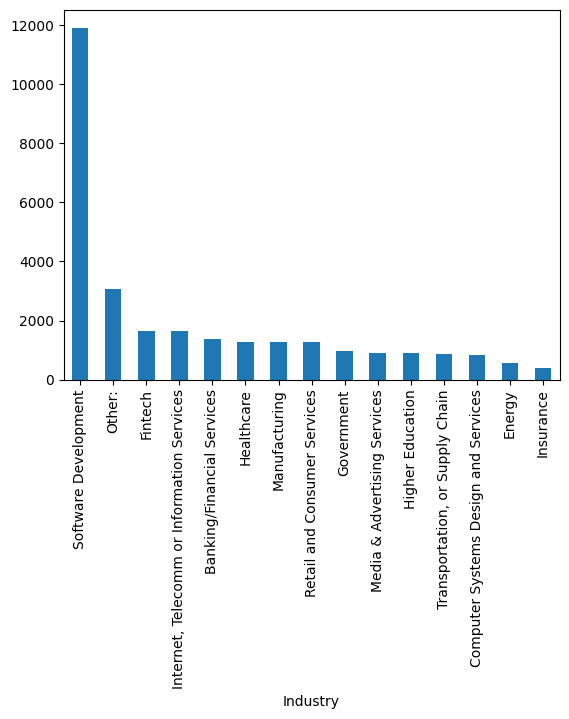

In [141]:
##Write your code here
Industry_Distribution=df['Industry'].value_counts()
Industry_Distribution.plot(kind='bar')

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [142]:
##Write your code here
df=df.dropna(subset=['ConvertedCompYearly'])
MeanComp=round(df['ConvertedCompYearly'].mean(),2)
MedianComp=round(df['ConvertedCompYearly'].median(),2)
StdComp=round(df['ConvertedCompYearly'].std(),2)
print("Mean:",MeanComp)
print("Median:",MedianComp)
print("StdDev:",StdComp)
Threshold=round(3*StdComp+MeanComp,2)
print("Threshold:",Threshold)
df_OutsideThreshold=df[df['ConvertedCompYearly']>Threshold]
print('Number of Entries Exceeding Threshold:',len(df_OutsideThreshold))

Mean: 86155.29
Median: 65000.0
StdDev: 186756.97
Threshold: 646426.2
Number of Entries Exceeding Threshold: 89


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


[(0.0, 2000000.0)]

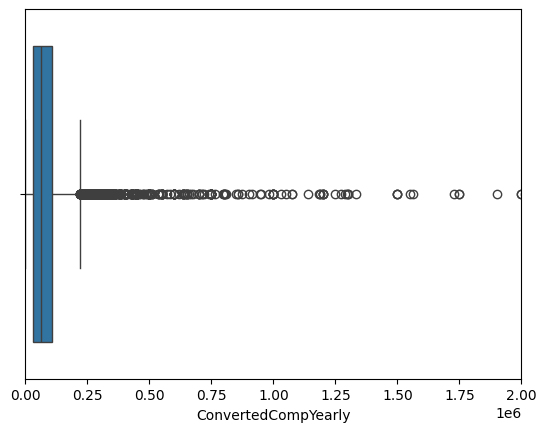

In [143]:
##Write your code here
ax=sns.boxplot(x=df['ConvertedCompYearly'])
ax.set(xlim=(0, 2000000)) # Adjust the x-axis range

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


Outlier count in the given Dataset 978
New Data Set excluding Outliers and NA values has : 22457 entries


<Axes: xlabel='ConvertedCompYearly'>

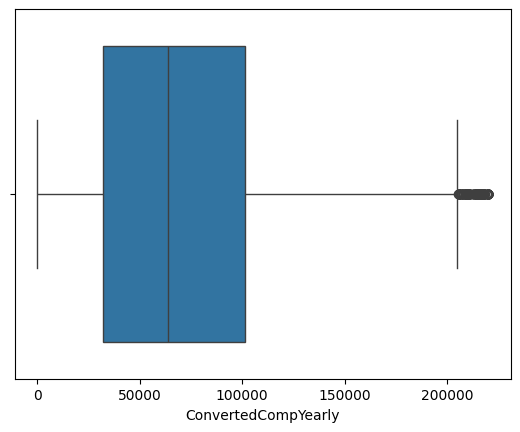

In [144]:
##Write your code here

q1=np.percentile(df['ConvertedCompYearly'],25)
q3=np.percentile(df['ConvertedCompYearly'],75)
iqr = q3-q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = [x for x in df['ConvertedCompYearly'] if x < lower_bound or x > upper_bound]
print("Outlier count in the given Dataset",len(outliers))
df_excludes_outlier=df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]
print('New Data Set excluding Outliers and NA values has :',len(df_excludes_outlier),'entries')
sns.boxplot(x=df_excludes_outlier['ConvertedCompYearly'])

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [156]:
##Write your code here
print(df['Age'].value_counts())
#age_mapping = {
#    'Under 18 years old': 18,       
#    '18-24 years old': 21,
#    '25-34 years old': 29,
#    '35-44 years old': 39,
#    '45-54 years old': 49,
#    '55-64 years old': 59,
#    '65 years or older':65,
#    'Prefer not to say':0 
#}

# Sample DataFrame (replace with your actual data)
#df['Age'] = df['Age'].map(age_mapping)
#print(df['Age'].value_counts())
print("Correlation between Age and Job Sat:", df['Age'].corr(df['JobSat']))
print("Correlation between Age and ConvertedCompYearly:", df['Age'].corr(df['ConvertedCompYearly']))
df['YearsCodePro']=df['YearsCodePro'].replace("Less than 1 year",1)
df['YearsCodePro']=df['YearsCodePro'].replace("More than 50 years",50)
df['YearsCodePro']=df['YearsCodePro'].astype('int')
print("Correlation between Age and YearsCodePro:", df['Age'].corr(df['YearsCodePro']))

Age
29    10369
39     6231
21     3433
49     2329
59      863
65      137
18       64
0         9
Name: count, dtype: int64
Correlation between Age and Job Sat: 0.069498631086537
Correlation between Age and ConvertedCompYearly: 0.12071129393681637


ValueError: cannot convert float NaN to integer

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
